## Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models,datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

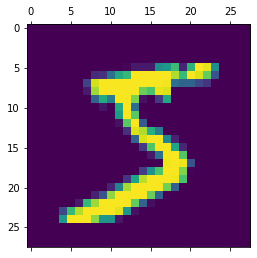

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Very simple neural network with no hidden layers

In [19]:
model = models.Sequential([
    layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4685 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2723 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2667 - accuracy: 0.9255


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9263


[0.26637381315231323, 0.9262999892234802]

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.9358722e-02, 3.6929055e-07, 5.7596087e-02, 9.4702828e-01,
       2.1278560e-03, 1.2743707e-01, 1.8543645e-06, 9.9975294e-01,
       1.1065349e-01, 7.5491434e-01], dtype=float32)

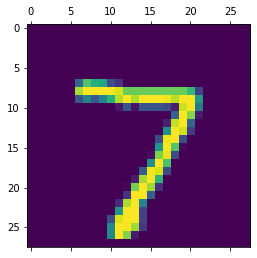

In [22]:
plt.matshow(X_test[0])

np.argmax finds a maximum element from an array and returns the index of it

In [23]:
np.argmax(y_predicted[0])

7

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    9,  929,   14,    7,    5,   11,   10,   36,    4],
       [   4,    0,   20,  904,    1,   41,    2,   10,   20,    8],
       [   1,    1,    5,    1,  913,    0,   10,    4,   10,   37],
       [   9,    3,    4,   16,   10,  797,   14,    3,   30,    6],
       [  14,    3,    8,    1,    8,   16,  904,    2,    2,    0],
       [   1,    5,   24,    5,    5,    1,    0,  950,    3,   34],
       [   7,   10,    6,   17,    9,   35,    8,   12,  864,    6],
       [  10,    7,    2,    9,   25,   10,    0,   19,    4,  923]])>

Text(69.0, 0.5, 'Truth')

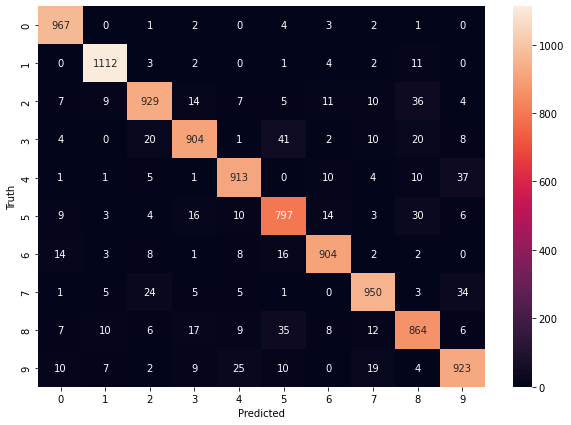

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using hidden layer

In [28]:
model = models.Sequential([
    layers.Dense(100, input_shape=(784,), activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2817 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1294 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0892 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0686 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0545 - accuracy: 0.9829


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9751


[0.08575920760631561, 0.9750999808311462]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

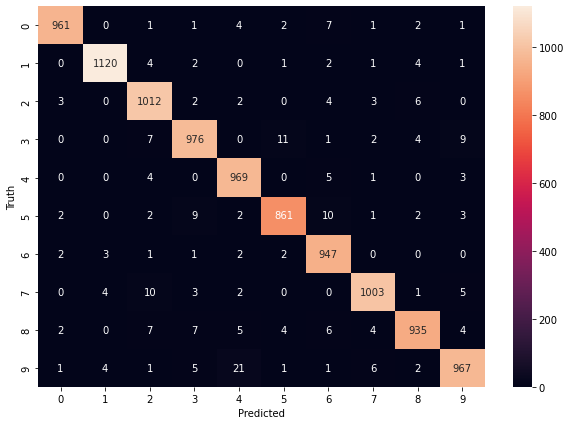

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [32]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2725 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1267 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0888 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0686 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0545 - accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0431 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0357 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0277 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0257 - accuracy: 0.9918
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - l

In [33]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9767


[0.08450653403997421, 0.9767000079154968]

### Now let us build a convolutional neural network to train our images


In [34]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [35]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1363 - accuracy: 0.9596
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0466 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0324 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0176 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0142 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0118 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0094 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0077 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 63s 34m

In [37]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0346 - accuracy: 0.9909


[0.03456627577543259, 0.9908999800682068]